# Movie Analysis

__By: Brian Lee__

***

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***

Questions to consider:

* What are the most popular genres?
* How should we budget?
* What genres are most profitable?

Using info from IMDB, Rotten Tomatoes, etc, let's figure out with data what will play into "success"!

## Data Understanding

Let's take a look at the given movie datasets from the ZippedData directory.  

Movie datasets from: 

* IMDB
* Box Office Mojo
* Rotten Tomatoes 
* TheMovieDB
* The Numbers

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from matplotlib import pyplot

%matplotlib inline

### IMDB data

In [3]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


__Thoughts:__
These two IMDB tables may be good to look for genres and ratings. We should merge the two tables into one.

### Box Office Mojo

In [27]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


__Thoughts:__
This table may be good to look for gross profits.

### Rotten Tomatoes data

In [8]:
rt_movie_info_df=pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', header=0)
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [71]:
rt_reviews_df=pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter='\t',header=0, encoding='latin-1')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


__Thoughts:__
Let's not use the data from Rotten Tomatoes. There are no given datasets that will give us a title. 

### The Movie Database data

In [10]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


__Thoughts:__ Let's not use the data from The Movie Database. There are no given datasets that will give us genre_ids.

### The Numbers data

In [11]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


__Thoughts:__
This dataset has production budget, domestic/worldwide gross.

***
## Data Preparation

Having looked at the data available to us, let's prep the data to answer the questions we previously set.

* What are the most popular genres?
* How should we budget?
* What genres are most profitable?

### IMDB Data

* We need to merge data from tables using the primary key of 'tconst'
* Clean data for duplicates and NaN items
* We need to separate and create new columns, or create list with genres options for each movie

In [16]:
# Merging datasets using primary key of 'tconst'
imdb_df = title_basics.merge(title_ratings, how="inner", on='tconst')

In [17]:
# Let's split the string of genres into a searchable list
length = range(len(imdb_df['genres']))
for i in length:
    if type(imdb_df.loc[i,'genres']) == str:
        imdb_df.at[i, 'genres'] = imdb_df.loc[i, 'genres'].split(',')
    else:
        continue
imdb_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,[Documentary],6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"[Drama, Family]",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,[Documentary],8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [22]:
# Checking for missing data
imdb_df.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [21]:
# Missing data in runtime_minutes and genres. We probably want to remove items without genre as it is defining trait
imdb_df.dropna(subset=['genres'], inplace=True)

In [19]:
# We do not need the 'runtime_minutes' that is missing values in our data set. Will drop columns
imdb_df.drop(['runtime_minutes'],axis=1, inplace=True)

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy, Drama, Fantasy]",6.5,119


In [24]:
imdb_df.rename(columns={"averagerating":"avg_rating","numvotes":"num_votes"},inplace=True)

In [25]:
# Setting index to tconst
imdb_df.set_index('tconst',inplace=True)

In [26]:
# Check again for missing data items
print(imdb_df.isna().sum())

# Final check on dataset
imdb_df

primary_title     0
original_title    0
start_year        0
genres            0
avg_rating        0
num_votes         0
dtype: int64


,primary_title,original_title,start_year,genres,avg_rating,num_votes
tconst,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,[Drama],6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy, Drama, Fantasy]",6.5,119
...,...,...,...,...,...,...
tt9913056,Swarm Season,Swarm Season,2019,[Documentary],6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,[Documentary],6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136


### Box Office Mojo Data:

* Clean data for duplicates and NaN items
* Changing data types for gross

In [31]:
# Check for data types and missing data
display(movie_gross.head())
display(movie_gross.info())
movie_gross.isna().sum()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [33]:
# We do not need the 'studio' that is missing values in our data set. Will drop columns
movie_gross.drop(['studio'],axis=1, inplace=True)

In [36]:
# Replace zero values for gross values with 0
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(0)
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)

In [35]:
# Checking again for missing data
display(movie_gross.isna().sum())
display(movie_gross.info())

title             0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


None

There must still be a string as foreign gross is still an object after the NaN values were replaced.


In [37]:
# Creating a function to change money strings to a usable float.
def change_money(money):
    if type(money) == str:
        money = money.replace("$","").replace(",","")
        money = float(money) #changing to float in case of cents
        return money
    else:
        return money

In [38]:
# Let's change the string to a float using the change_money function:
movie_gross['foreign_gross'] = movie_gross.apply(lambda x: change_money(x['foreign_gross']), axis=1)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 106.0+ KB


In [39]:
# Adding a column for worldwide gross
movie_gross['worldwide_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross

,title,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
3382,The Quake,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),4800.0,0.0,2018,4.800000e+03
3384,El Pacto,2500.0,0.0,2018,2.500000e+03
3385,The Swan,2400.0,0.0,2018,2.400000e+03


### The Numbers Data:

* Using the titles, budget, and gross values
* Clean data for duplicates and NaN items
* Changing data types for gross

In [41]:
# Check for data types and missing data
display(movie_budgets.head())
display(movie_budgets.info())
movie_budgets.isna().sum()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [42]:
# Adjust the values of dataframe to floats
movie_budgets['production_budget'] = movie_budgets.apply(lambda x: change_money(x['production_budget']), axis=1)
movie_budgets['domestic_gross'] = movie_budgets.apply(lambda x: change_money(x['domestic_gross']), axis=1)
movie_budgets['worldwide_gross'] = movie_budgets.apply(lambda x: change_money(x['worldwide_gross']), axis=1)
display(movie_budgets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


None

In [43]:
# Final check
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


***
## Data Modeling

The data is now ready to go. Let's analyze and model the data to answer the questions we previously set.

* What are the most popular genres?
* What genres are most profitable?
* How should we budget?

## What are the most popular genres?

Let's analyze the IMDB data to find out.

In [45]:
# Analysis on ratings of movies
imdb_df['avg_rating'].describe()
imdb_df

,primary_title,original_title,start_year,genres,avg_rating,num_votes
tconst,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,[Drama],6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy, Drama, Fantasy]",6.5,119
...,...,...,...,...,...,...
tt9913056,Swarm Season,Swarm Season,2019,[Documentary],6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,[Documentary],6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136


In [46]:
# Using the explode function, create a separate table for each genre to stand out for each title
genre_title = imdb_df['genres'].explode().to_frame()
genre_title

,genres
tconst,
tt0063540,Action
tt0063540,Crime
tt0063540,Drama
tt0066787,Biography
tt0066787,Drama
...,...
tt9913084,Documentary
tt9914286,Drama
tt9914286,Family


In [47]:
# We can merge with the original table to get a line for each genre.
genre_rating = genre_title.merge(imdb_df, on='tconst')
genre_rating

,genres_x,primary_title,original_title,start_year,genres_y,avg_rating,num_votes
tconst,,,,,,,
tt0063540,Action,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0063540,Crime,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0063540,Drama,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
tt0066787,Biography,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
tt0066787,Drama,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43
...,...,...,...,...,...,...,...
tt9913084,Documentary,Diabolik sono io,Diabolik sono io,2019,[Documentary],6.2,6
tt9914286,Drama,Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136
tt9914286,Family,Sokagin Çocuklari,Sokagin Çocuklari,2019,"[Drama, Family]",8.7,136


In [48]:
# Dropping the duplicate genre table as it is redundant now.
genre_rating.drop('genres_y', axis=1, inplace=True)

In [50]:
# Renaming genre column name back to how it was
genre_rating.rename(columns={"genres_x":"genres"},inplace=True)
genre_rating

,genres,primary_title,original_title,start_year,avg_rating,num_votes
tconst,,,,,,
tt0063540,Action,Sunghursh,Sunghursh,2013,7.0,77
tt0063540,Crime,Sunghursh,Sunghursh,2013,7.0,77
tt0063540,Drama,Sunghursh,Sunghursh,2013,7.0,77
tt0066787,Biography,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,7.2,43
tt0066787,Drama,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,7.2,43
...,...,...,...,...,...,...
tt9913084,Documentary,Diabolik sono io,Diabolik sono io,2019,6.2,6
tt9914286,Drama,Sokagin Çocuklari,Sokagin Çocuklari,2019,8.7,136
tt9914286,Family,Sokagin Çocuklari,Sokagin Çocuklari,2019,8.7,136


### Number of Genre Occurences in Movies
Let's check how often genres occur within the movie landscape. We can visualize this now!

In [63]:
genre_rating['genres'].value_counts().sort_values()

Short              1
Game-Show          2
Adult              3
Reality-TV        17
Western          280
News             579
Musical          721
War              853
Sport           1179
Animation       1743
Music           1968
Fantasy         2126
Sci-Fi          2206
History         2825
Mystery         3039
Family          3412
Biography       3809
Adventure       3817
Crime           4611
Romance         6589
Action          6988
Horror          7674
Thriller        8217
Comedy         17290
Documentary    17753
Drama          30788
Name: genres, dtype: int64

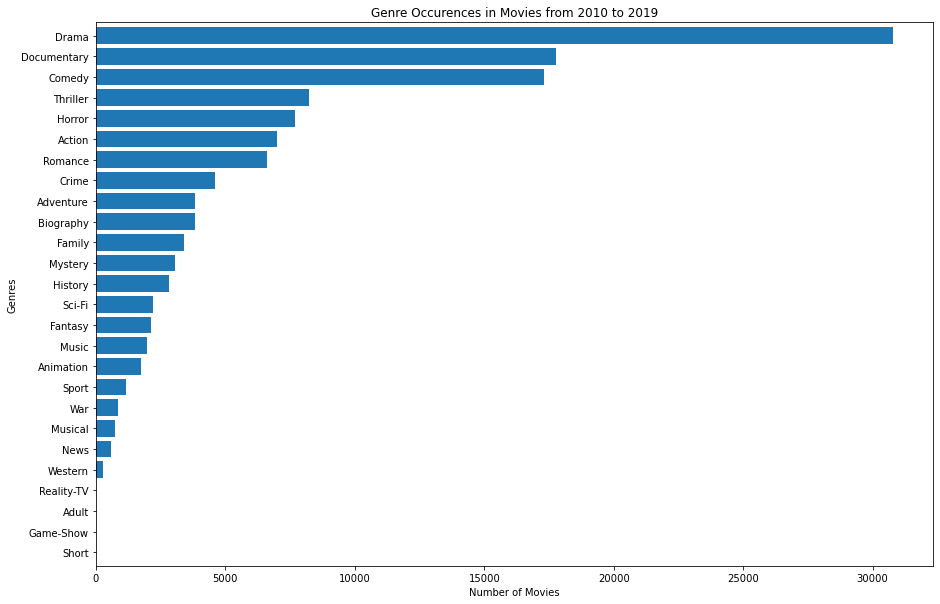

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = genre_rating['genres'].value_counts().sort_values().plot(kind='barh', width=0.8)
ax.set_title("Genre Occurences in Movies from 2010 to 2019")
ax.set_ylabel("Genres")
ax.set_xlabel("Number of Movies");

We can see that the following movie genres populate the market by far over the past 10 years:
* __Drama__
* __Documentary__
* __Comedy__
* __Thriller__
  
These list of genres could be good or bad for us to use for Microsoft's movies.
We will need to use the popularity of the movies to best gauge what the viewers __ACTUALLY__ enjoy.

### Average Reviews per Genre

Let's get the average movie scores per movie genre. This will help us get a better grasp of how viewers rate genres.

In [65]:
genre_rating.groupby(['genres'])['avg_rating'].mean().sort_values()

genres
Adult          3.766667
Horror         5.003440
Sci-Fi         5.489755
Thriller       5.639114
Action         5.810361
Western        5.868214
Fantasy        5.919473
Mystery        5.920401
Comedy         6.002689
Crime          6.115441
Romance        6.146608
Adventure      6.196201
Animation      6.248308
Family         6.394725
Drama          6.401559
Musical        6.498336
Reality-TV     6.500000
War            6.584291
Sport          6.961493
History        7.040956
Music          7.091972
Biography      7.162274
News           7.271330
Game-Show      7.300000
Documentary    7.332090
Short          8.800000
Name: avg_rating, dtype: float64

In [76]:
# Median Score of all genres: Best comparison as there appears to be outliers (Adult and Short)
genre_rating.groupby(['genres'])['avg_rating'].mean().sort_values().median()

6.32151600876796

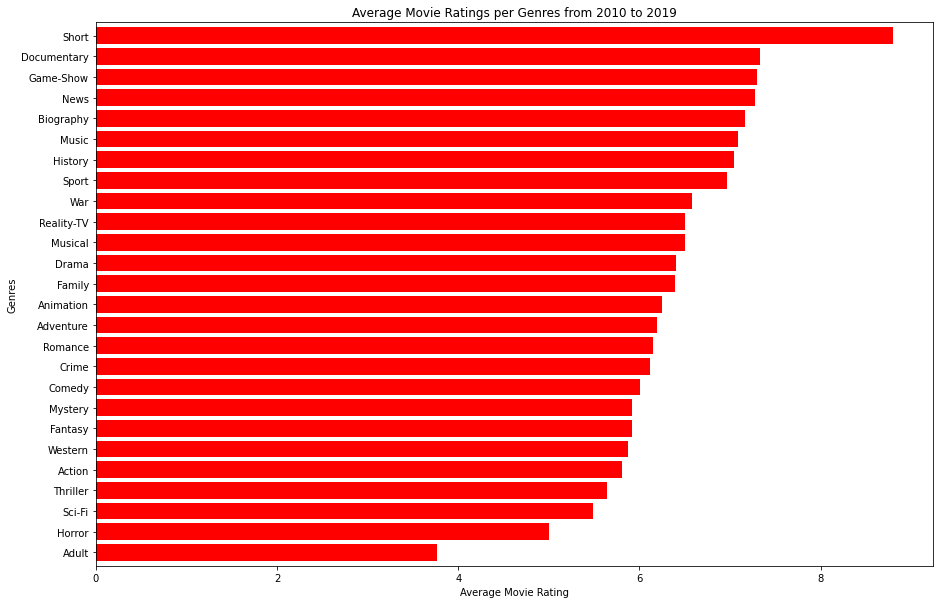

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = genre_rating.groupby(['genres'])['avg_rating'].mean().sort_values().plot(kind='barh', width=0.8, color='red')
ax.set_title("Average Movie Ratings per Genres from 2010 to 2019")
ax.set_ylabel("Genres")
ax.set_xlabel("Average Movie Rating");

Interesting. We see that Short, Documentary, and Game-Show has the highest Average Movie Ratings. We saw in the previous genre occurence graph that these two genres are some of the least common.
  
Could something be wrong here? Let's take a look at the total number of votes for each genre.

In [66]:
genre_rating.groupby(['genres'])['num_votes'].sum().sort_values()

genres
Short                  8
Adult                164
Reality-TV           459
Game-Show           3469
News              123319
Musical          1387965
Western          2452376
War              2684725
Sport            3755824
Documentary      4739345
Music            5453369
History          7843349
Family           8636710
Animation       15353302
Biography       21609446
Horror          23884695
Mystery         24657286
Fantasy         26335704
Romance         26913873
Crime           39631356
Sci-Fi          42960289
Thriller        48155313
Comedy          74305805
Adventure       84232589
Action         101161682
Drama          119567500
Name: num_votes, dtype: int64

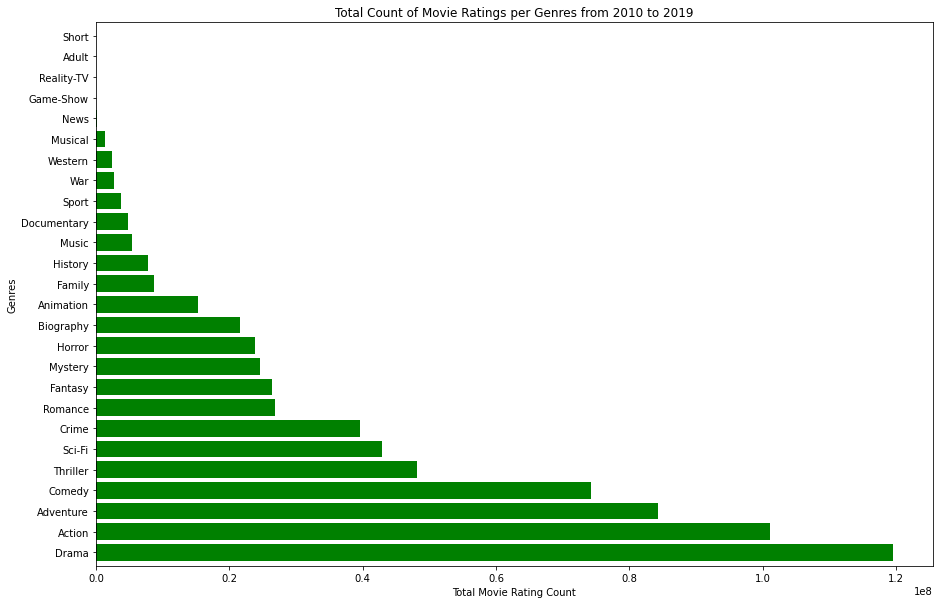

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = genre_rating.groupby(['genres'])['num_votes'].sum().sort_values(ascending=False).plot(kind='barh', width=0.8, color='green')
ax.set_title("Total Count of Movie Ratings per Genres from 2010 to 2019")
ax.set_ylabel("Genres")
ax.set_xlabel("Total Movie Rating Count");

There are much fewer movie review ratings for genres like Short and Game-show. The few number of votes may be driving the average movie score for the genre to be higher or lower than normal.
  
It may be safer to go with movie genres that have a solid number of movie occurences and vote counts and an average movie score close to the score median __6.32__.
  
Genres that stand out with this in mind are the following:
* Documentary (Average Movie score = __7.33__, Movie Occurences = __17,753__, Vote Count = __4,739,345__)
* Biography (Average Movie score = __7.16__, Movie Occurences = __3,809__, Vote Count = __21,609,446__)
* Drama (Average Movie score = __6.40__, Movie Occurences = __30,788__, Vote Count = __119,567,500__)
* Animation (Average Movie score = __6.25__, Movie Occurences = __1,743__, Vote Count = __15,353,302__)
* Adventure (Average Movie score = __6.20__, Movie Occurences = __3,817__, Vote Count = __84,232,589__)

***
### What genres are most profitable?

Let's visualize genre to gross using BOM and Numbers dataset 

In [81]:
display(movie_gross.info())
display(movie_gross.head())
movie_gross.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   domestic_gross   3387 non-null   float64
 2   foreign_gross    3387 non-null   float64
 3   year             3387 non-null   int64  
 4   worldwide_gross  3387 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 132.4+ KB


None

,title,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08


,domestic_gross,foreign_gross,year,worldwide_gross
count,3.387000e+03,3.387000e+03,3387.000000,3.387000e+03
mean,2.850821e+07,4.502979e+07,2013.958075,7.353800e+07
std,6.675575e+07,1.126843e+08,2.478141,1.705091e+08
min,0.000000e+00,0.000000e+00,2010.000000,1.000000e+02
25%,1.115000e+05,0.000000e+00,2012.000000,2.740000e+05
50%,1.300000e+06,1.500000e+06,2014.000000,5.475000e+06
75%,2.750000e+07,2.915000e+07,2016.000000,6.135000e+07
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [83]:
# Merge genre and gross tables (based on movie title) to relate the gross values and genre
bom_df = genre_rating.merge(movie_gross, left_on="primary_title", right_on="title")
bom_df

,genres,primary_title,original_title,start_year,avg_rating,num_votes,title,domestic_gross,foreign_gross,year,worldwide_gross
0,Action,Wazir,Wazir,2016,7.1,15378,Wazir,1100000.0,0.0,2016,1100000.0
1,Crime,Wazir,Wazir,2016,7.1,15378,Wazir,1100000.0,0.0,2016,1100000.0
2,Drama,Wazir,Wazir,2016,7.1,15378,Wazir,1100000.0,0.0,2016,1100000.0
3,Adventure,On the Road,On the Road,2012,6.1,37886,On the Road,744000.0,8000000.0,2012,8744000.0
4,Drama,On the Road,On the Road,2012,6.1,37886,On the Road,744000.0,8000000.0,2012,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...
6973,Drama,Helicopter Eela,Helicopter Eela,2018,5.4,673,Helicopter Eela,72000.0,0.0,2018,72000.0
6974,Drama,Last Letter,"Ni hao, Zhihua",2018,6.4,322,Last Letter,181000.0,0.0,2018,181000.0
6975,Romance,Last Letter,"Ni hao, Zhihua",2018,6.4,322,Last Letter,181000.0,0.0,2018,181000.0
6976,Documentary,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,8.8,2067,Burn the Stage: The Movie,4200000.0,16100000.0,2018,20300000.0


In [85]:
# Worldwide Gross per Genre
bom_df.groupby(['genres'])['worldwide_gross'].mean().sort_values()

genres
News           1.621035e+07
War            1.630128e+07
Documentary    2.740189e+07
Romance        3.416476e+07
Drama          3.919474e+07
Music          4.028660e+07
History        4.162610e+07
Biography      4.596821e+07
Crime          5.071587e+07
Mystery        5.740066e+07
Western        5.748127e+07
Horror         6.341629e+07
Musical        7.176503e+07
Thriller       7.739527e+07
Comedy         8.331336e+07
Sport          8.365973e+07
Family         1.178723e+08
Fantasy        1.619324e+08
Action         1.646636e+08
Animation      2.552529e+08
Adventure      2.721899e+08
Sci-Fi         2.861222e+08
Name: worldwide_gross, dtype: float64

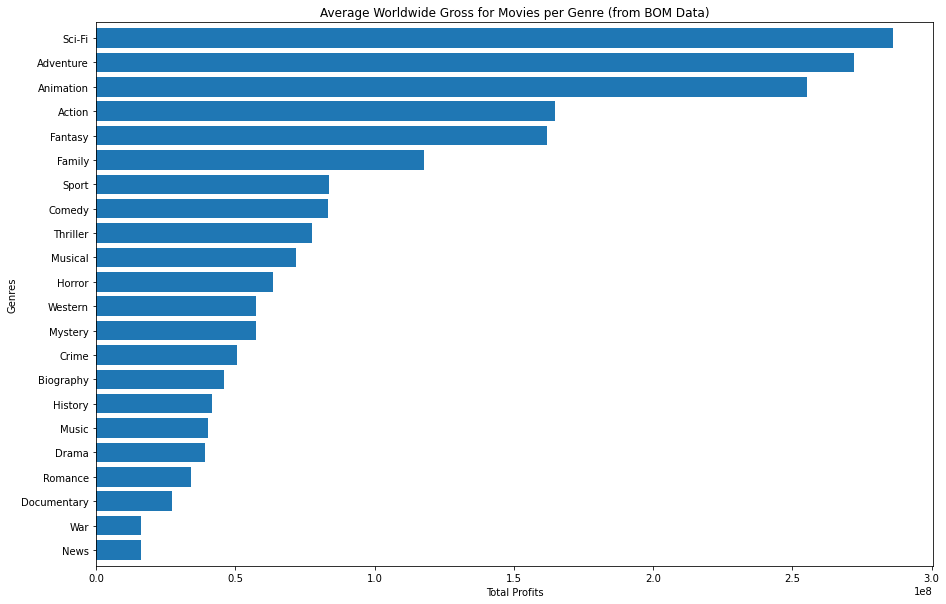

In [128]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = bom_df.groupby(['genres'])['worldwide_gross'].mean().sort_values().plot(kind='barh', width=0.8)
ax.set_title("Average Worldwide Gross for Movies per Genre (from BOM Data)")
ax.set_ylabel("Genres")
ax.set_xlabel("Total Profits");

The most profitable genres by a large margin appear to be the following:
* __Sci-Fi__
* __Adventure__
* __Animation__

Let's see if movie profits from __The Numbers__ dataset display similar results.

In [98]:
num_df = genre_rating.merge(movie_budgets, left_on="primary_title", right_on="movie")
num_df.head()

,genres,primary_title,original_title,start_year,avg_rating,num_votes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Action,Foodfight!,Foodfight!,2012,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,Animation,Foodfight!,Foodfight!,2012,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
2,Comedy,Foodfight!,Foodfight!,2012,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
3,Adventure,On the Road,On the Road,2012,6.1,37886,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
4,Drama,On the Road,On the Road,2012,6.1,37886,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0


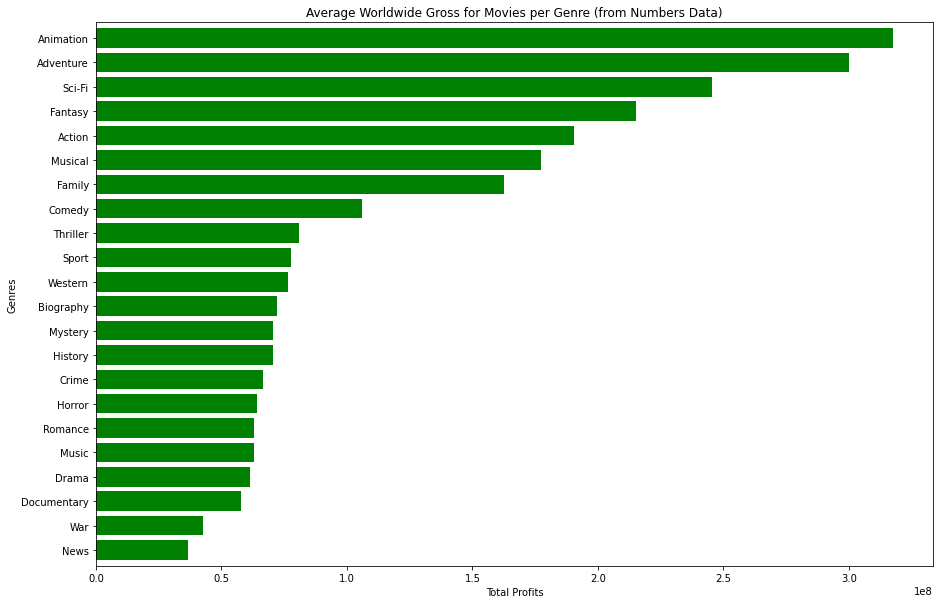

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = num_df.groupby(['genres'])['worldwide_gross'].mean().sort_values().plot(kind='barh', width=0.8, color='green')
ax.set_title("Average Worldwide Gross for Movies per Genre (from Numbers Data)")
ax.set_ylabel("Genres")
ax.set_xlabel("Total Profits");

Once again, the most profitable genres by a large margin appear to be the following:
* __Sci-Fi__
* __Adventure__
* __Animation__

The best direction for Microsoft may be to use these genres for its upcoming movie.

***
### How should we budget?

Let's check the relationship between budget and profit of movies using The Numbers dataset.

In [90]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


Text(0, 0.5, 'Total Profit')

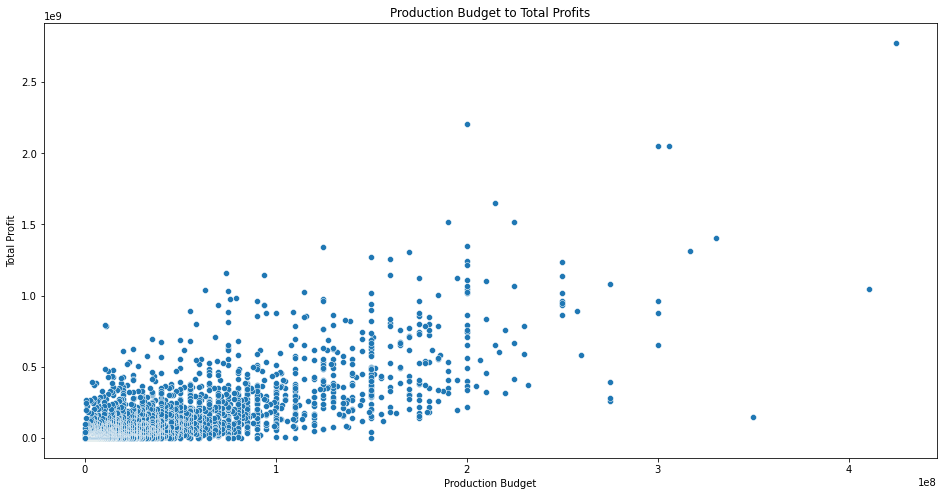

In [91]:
# Budget vs Profit
fig, ax = pyplot.subplots(figsize=(16,8))
sns.scatterplot(data=movie_budgets, x="production_budget", y="worldwide_gross");
ax.set_title('Production Budget to Total Profits')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Total Profit')

There is a __positive correlation__ between movie production budget and profits gained(domestic + worldwide).

We can expect a higher budget will yield higher profits.

### Now let's visualize the profits and budgets per genre.

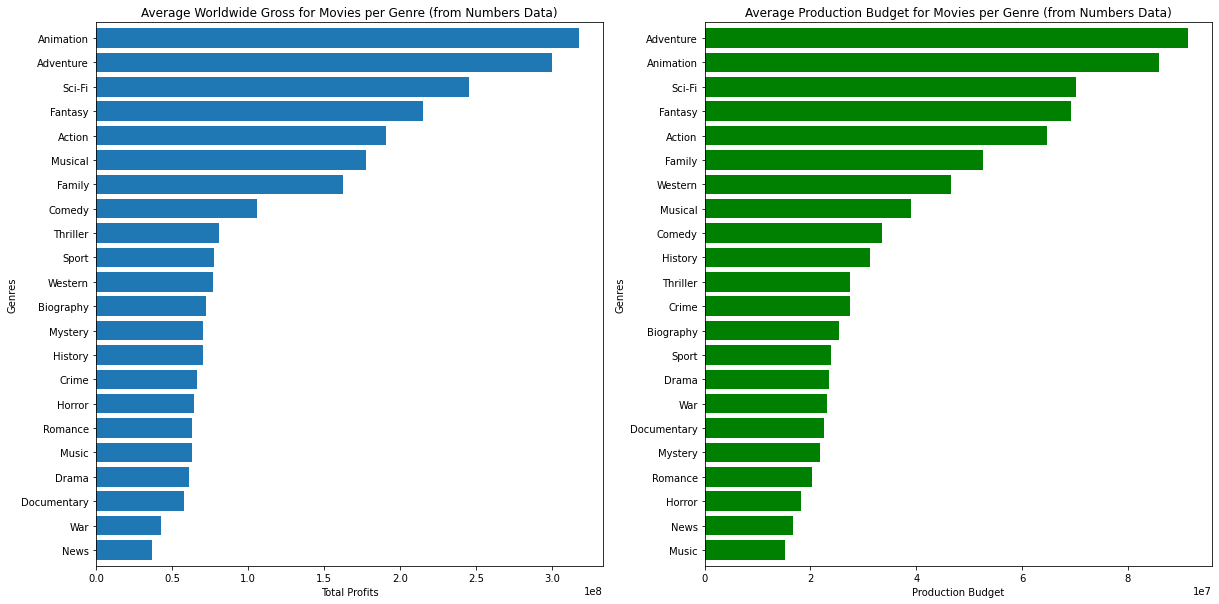

In [124]:
# Plotting average of gross and budget
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
num_df.groupby(['genres'])['worldwide_gross'].mean().sort_values().plot(kind='barh', width=0.8, ax=ax1)
ax1.set_title("Average Worldwide Gross for Movies per Genre (from Numbers Data)")
ax1.set_ylabel("Genres")
ax1.set_xlabel("Total Profits");

ax2 = plt.subplot(1,2,2)
num_df.groupby(['genres'])['production_budget'].mean().sort_values().plot(kind='barh', width=0.8, color='green', ax=ax2)
ax2.set_title("Average Production Budget for Movies per Genre (from Numbers Data)")
ax2.set_ylabel("Genres")
ax2.set_xlabel("Production Budget");

The Top 4 genres are:
* Animation
* Adventure
* Sci-Fi
* Fantasy

We need to visualize the mean and median to see if there is an outlier that may be elevating a genre.

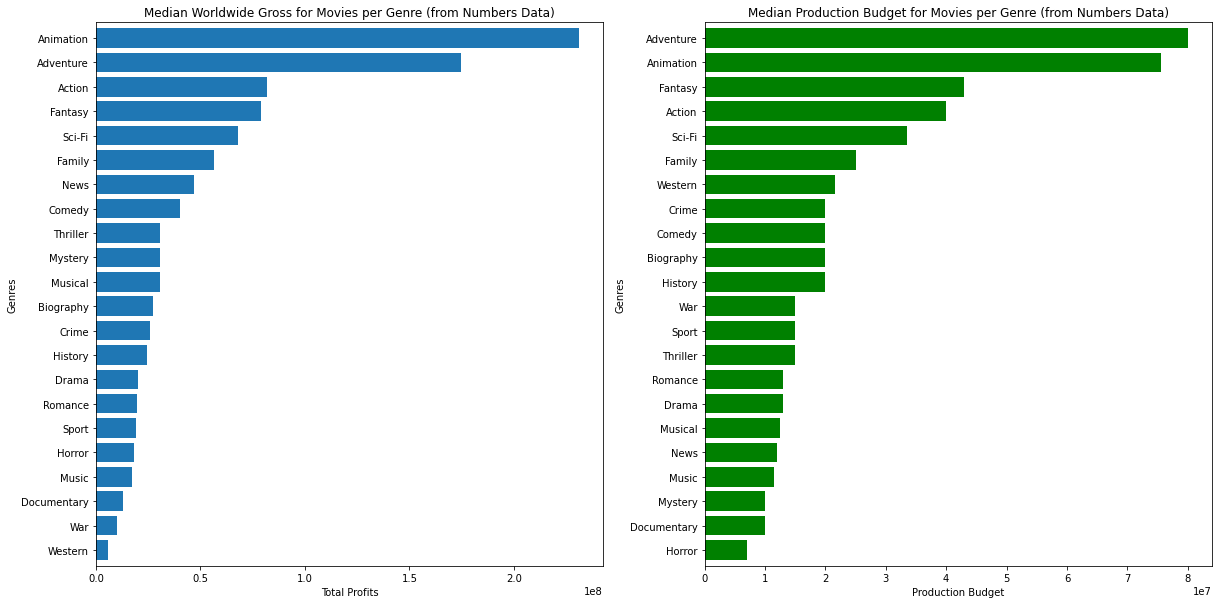

In [123]:
# Plotting median of gross and budget
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
num_df.groupby(['genres'])['worldwide_gross'].median().sort_values().plot(kind='barh', width=0.8, ax=ax1)
ax1.set_title("Median Worldwide Gross for Movies per Genre (from Numbers Data)")
ax1.set_ylabel("Genres")
ax1.set_xlabel("Total Profits");

ax2 = plt.subplot(1,2,2)
num_df.groupby(['genres'])['production_budget'].median().sort_values().plot(kind='barh', width=0.8, color='green', ax=ax2)
ax2.set_title("Median Production Budget for Movies per Genre (from Numbers Data)")
ax2.set_ylabel("Genres")
ax2.set_xlabel("Production Budget");

The Top 4 genres are:
* Animation
* Adventure
* Action
* Fantasy

There appears to have been an outlier success Sci-Fi movie that was raising the average production budget and gross for Sci-Fi.

***
## Conclusions

The analysis of the movie datasets resulted in the following answers to the initial questions:

* __What are the most popular genres?__  
  The stand-out genres were:  
  * __Documentary__
  * __Biography__
  * __Drama__
  * __Animation__
  * __Adventure__
  
* __What genres are most profitable?__  
  The most profitable genres were:
  * __Animation__
  * __Adventure__
  * __Sci-fi__
  
* __How should we budget?__  
  A larger budget will likely lead to a larger profit margin.  
  The following genres that exemplified this were:
  * __Animation__
  * __Adventure__
  * __Action__
  * __Fantasy__
  
The analysis leads to the following recommendations for Microsoft's new studio:
* __The studio should focus on a movie with the Animation, Adventure, and Sci-Fi genres.__  
  These genres displayed the highest likelihood for popularity and profitability based on the visualizations
* __The studio should aim for a larger production budget__  
  A larger production budget will likely result in a much greater gross profit.  

## Next Steps:

Further analyses of the movie datasets could yield additional insights to studio recommendations:  
* __Best genres for lower budget movies__
* __Predicting changes in viewer taste over time__
* __Best possible budget limit for future films__